# 가설 2-1 : 지역별 배송비가 클수록 매출이 저조할 것이다.

- 가정1 : 고객은 자기 주소로 배송을 했다고 가정

## 데이터 확인

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Customers_Data.csv')
discount_coupon_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Discount_Coupon.csv')
marketing_spend_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Marketing_Spend.csv')
online_sales_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Online_Sales.csv')
tax_amount_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/archive/Tax_Amount.csv')

# 각 주문별 매출액이 담긴 csv
sales_df = pd.read_csv('C:/Users/hakju/OneDrive/바탕 화면/study/FIRST_PROJECT/temp/Sales.csv')

In [3]:
online_sales_df.sample(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
4822,17198,19908,2/7/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,119.00,6.50,Used
38347,15061,38330,9/17/2019,GGOEGAEJ030817,Google Women's Long Sleeve Blended Cardigan Ch...,Apparel,1,16.79,6.00,Clicked
16052,13798,26956,5/1/2019,GGOEGDHQ014899,20 oz Stainless Steel Insulated Tumbler,Drinkware,2,19.99,12.91,Clicked


In [4]:
sales_df.head(3)

,Unnamed: 0,CustomerID,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,GST,GST_numeric,sales
0,0,17850,16679,2019-01-01,Nest-USA,1,153.71,6.5,Used,ELEC10,10.0,10%,0.1,131.01
1,1,17850,16680,2019-01-01,Nest-USA,1,153.71,6.5,Used,ELEC10,10.0,10%,0.1,131.01
2,2,17850,16681,2019-01-01,Office,1,2.05,6.5,Used,OFF10,10.0,10%,0.1,8.16


In [5]:
sales_df = sales_df.drop(columns=['Unnamed: 0'], axis=1)

In [6]:
customer_df.sample(3)

,CustomerID,Gender,Location,Tenure_Months
332,14748,F,Chicago,31
659,14448,F,California,42
1403,14460,F,California,38


### 지역별 고객 수 시각화

<Axes: xlabel='Location', ylabel='count'>

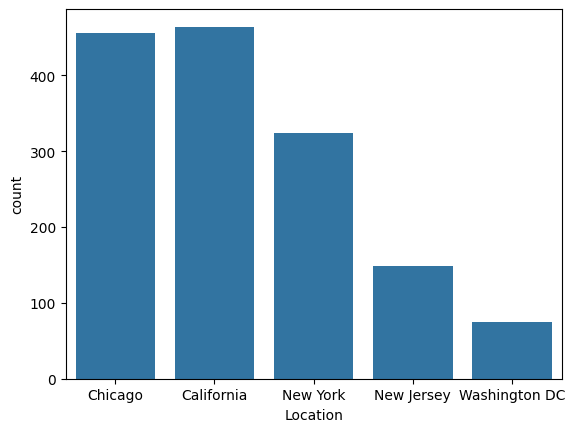

In [7]:
sns.countplot(data=customer_df, x='Location')

### 지역 별 매출 시각화

In [8]:
sales_customer_df = pd.merge(left=sales_df, right=customer_df, how='left', on='CustomerID')

In [9]:
location_sales = sales_customer_df.groupby('Location').agg({'sales': 'sum', 'Delivery_Charges' : 'mean'})
location_sales

,sales,Delivery_Charges
Location,,
California,1375041.62,10.718275
Chicago,1539820.63,10.507412
New Jersey,381687.97,9.496165
New York,897288.86,10.698711
Washington DC,242109.86,10.344374


<Axes: xlabel='Location', ylabel='sales'>

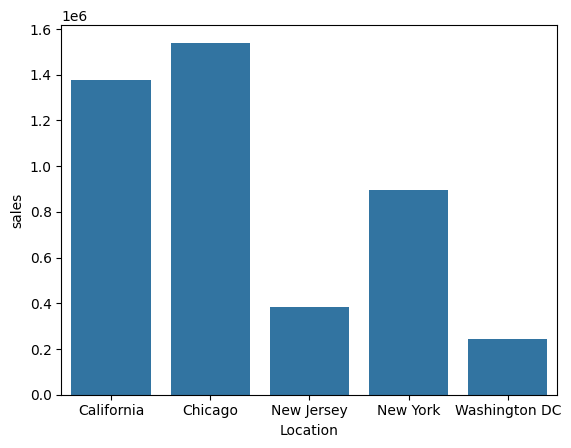

In [10]:
sns.barplot(data=location_sales, x=location_sales.index, y='sales')

### 지역별 배달비용 평균 시각화

<Axes: xlabel='Location', ylabel='Delivery_Charges'>

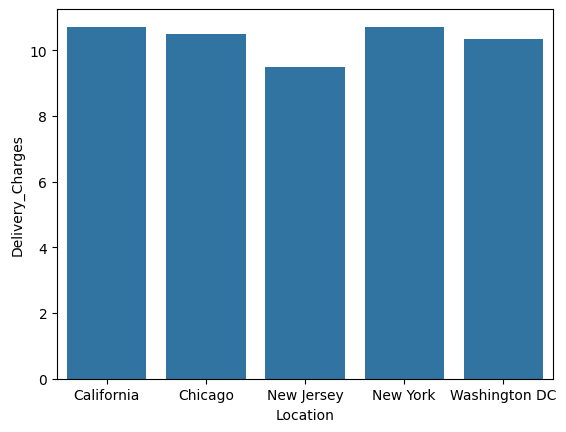

In [11]:
sns.barplot(data=location_sales, x=location_sales.index, y='Delivery_Charges')

### 결론
- 지역별 고객수는 캘리포니아, 시카고, 뉴저지, 뉴욕, 워싱턴DC 순이다.
- 지역별 매출은 시카고, 캘리포니아, 뉴욕, 뉴저지, 워싱턴DC 순이다.
- 지역별 배송료 평균은 캘리포니아, 뉴욕, 시카고, 워싱턴DC, 뉴저지 순이다.
- 지역 별 배송비 평균은 크게 다르지 않다.

- 즉, '지역별 배송비가 클수록 매출이 저조할 것이다.' 라는 가설은 유의미한 결론을 도출하기 어렵다.

### 추가로 생각할 수 있는 가설
- 배송비의 차이의 원인은 지역이 아니라 카테고리 별 차이가 심하다.
- 배송비 차이에 의해서 매출이 유의미하게 차이가 난다면 카테고리 별 배송비 이벤트 등을 기획할 수 있다.

# 가설 2-2 : 지역별 선호하는 상품이 편중되어 있을 것이다.

## 데이터 가공

In [12]:
sales_customer_df.sample(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,GST,GST_numeric,sales,Gender,Location,Tenure_Months
7830,12748,21901,2019-03-04,Nest-USA,1,149.00,6.50,Used,ELEC30,30.0,10%,0.1,100.37,F,Chicago,28
1568,17873,17730,2019-01-12,Office,4,4.94,35.96,Clicked,OFF10,10.0,10%,0.1,53.74,M,California,26
43293,15339,41498,2019-10-23,Nest-USA,3,79.00,6.00,Used,ELEC10,10.0,10%,0.1,197.97,F,Chicago,47


In [13]:
sales_customer_df_groupby = sales_customer_df.groupby(['Location','Product_Category'])[['CustomerID']].count()
sales_customer_df_groupby

CustomerID
Location      Product_Category                
California    Accessories                   80
              Android                       13
              Apparel                     5491
              Backpacks                     29
              Bags                         539
...                                        ...
Washington DC Nest-Canada                   20
              Nest-USA                     796
              Notebooks & Journals          29
              Office                       316
              Waze                          33

[100 rows x 1 columns]

## 각 지역별 Top5 상품 시각화

In [14]:
def get_top_five(column) :
    ascending = sales_customer_df_groupby.loc[column].sort_values(by='CustomerID',ascending=False)
    cnt_list = ascending.iloc[:5,0].values.tolist()
    index_list = ascending.iloc[:5,0].index.tolist()
    
    return cnt_list, index_list

In [15]:
sales_customer_df_groupby.loc['California'].sort_values(by='CustomerID',ascending=False)

,CustomerID
Product_Category,
Apparel,5491
Nest-USA,4184
Office,1993
Drinkware,1117
Lifestyle,977
Nest,762
Bags,539
Notebooks & Journals,238
Headgear,221


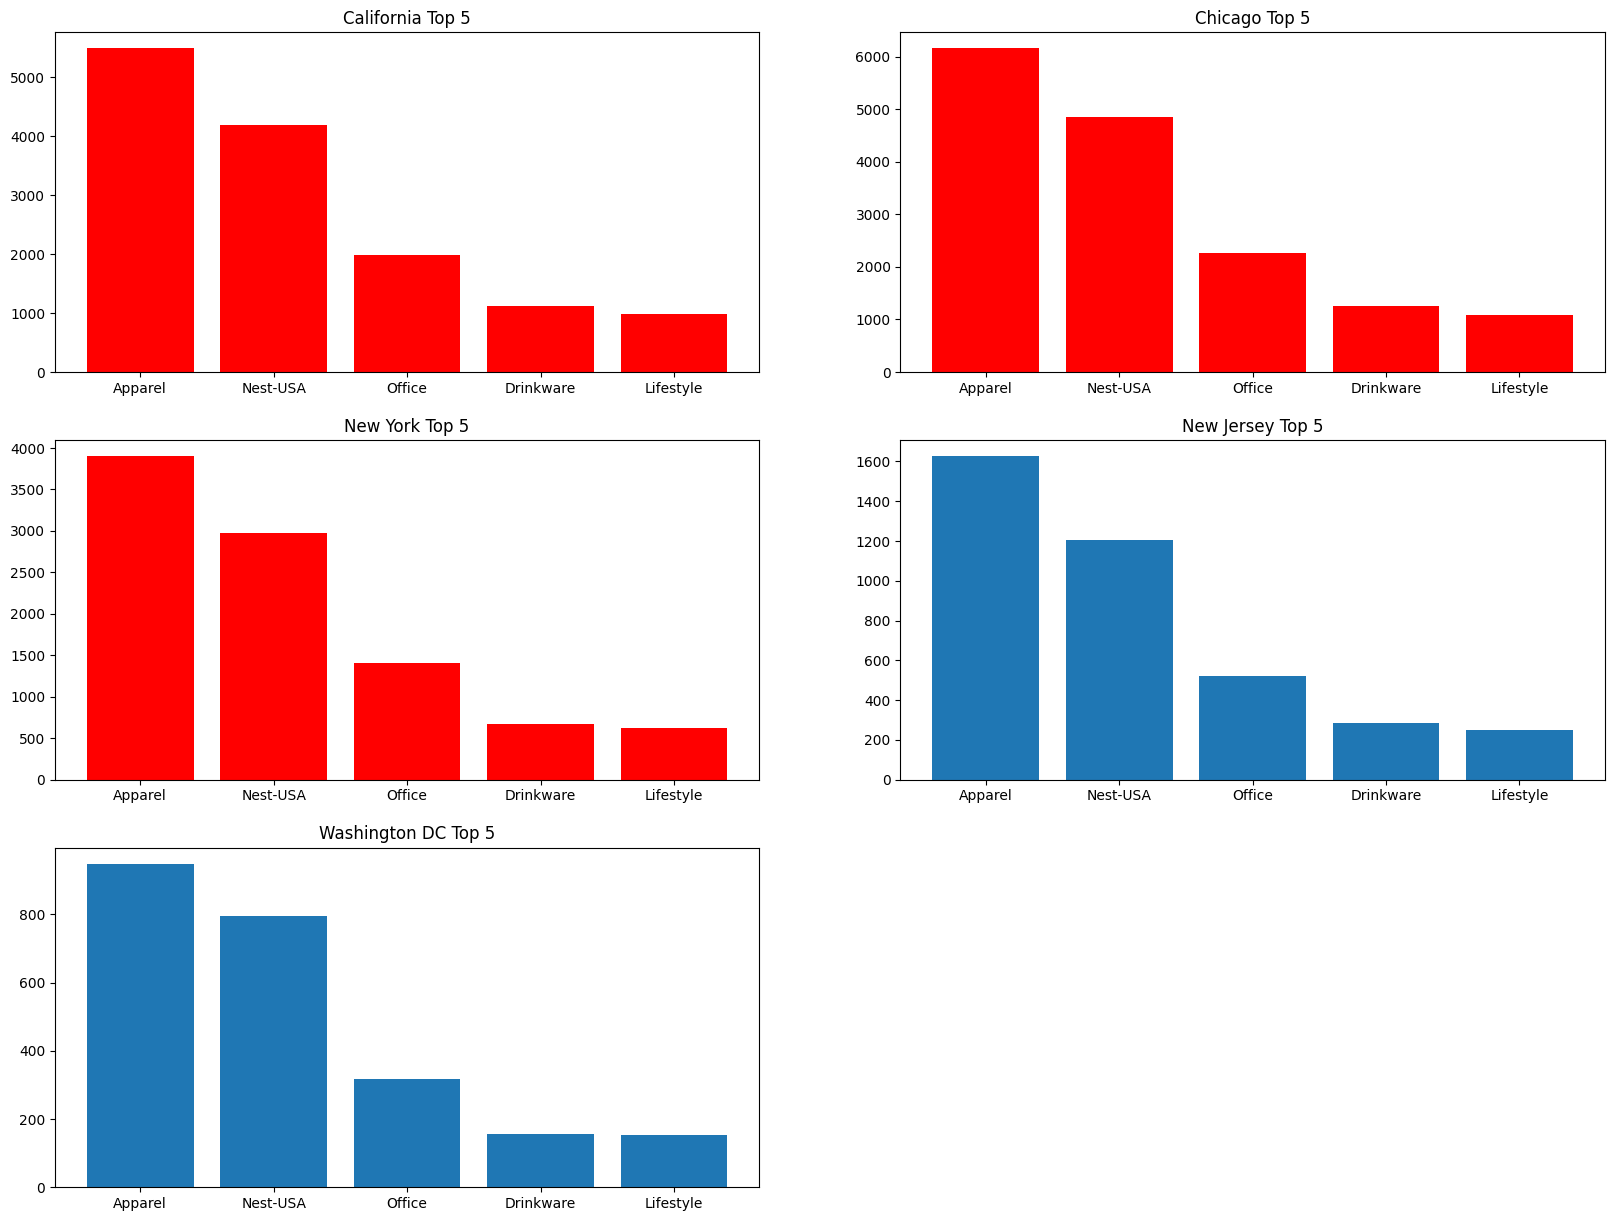

In [16]:
plt.figure(figsize=(20,15))

# 캘리포니아
plt.subplot(3,2,1)
california_cnt, california_index = get_top_five('California')
plt.title('California Top 5')
plt.bar(california_index, california_cnt, color='r')

# 시카고
plt.subplot(3,2,2)
chicago_cnt, chicago_index = get_top_five('Chicago')
plt.title('Chicago Top 5')
plt.bar(chicago_index, chicago_cnt, color='r')

# 뉴욕
plt.subplot(3,2,3)
newyork_cnt, newyork_index = get_top_five('New York')
plt.title('New York Top 5')
plt.bar(newyork_index, newyork_cnt, color='r')

# 뉴저지
plt.subplot(3,2,4)
newjersey_cnt, newjersey_index = get_top_five('New Jersey')
plt.title('New Jersey Top 5')
plt.bar(newjersey_index, newjersey_cnt)

# 워싱턴 DC
plt.subplot(3,2,5)
washington_cnt, washington_index = get_top_five('Washington DC')
plt.title('Washington DC Top 5')
plt.bar(washington_index, washington_cnt)

plt.show()

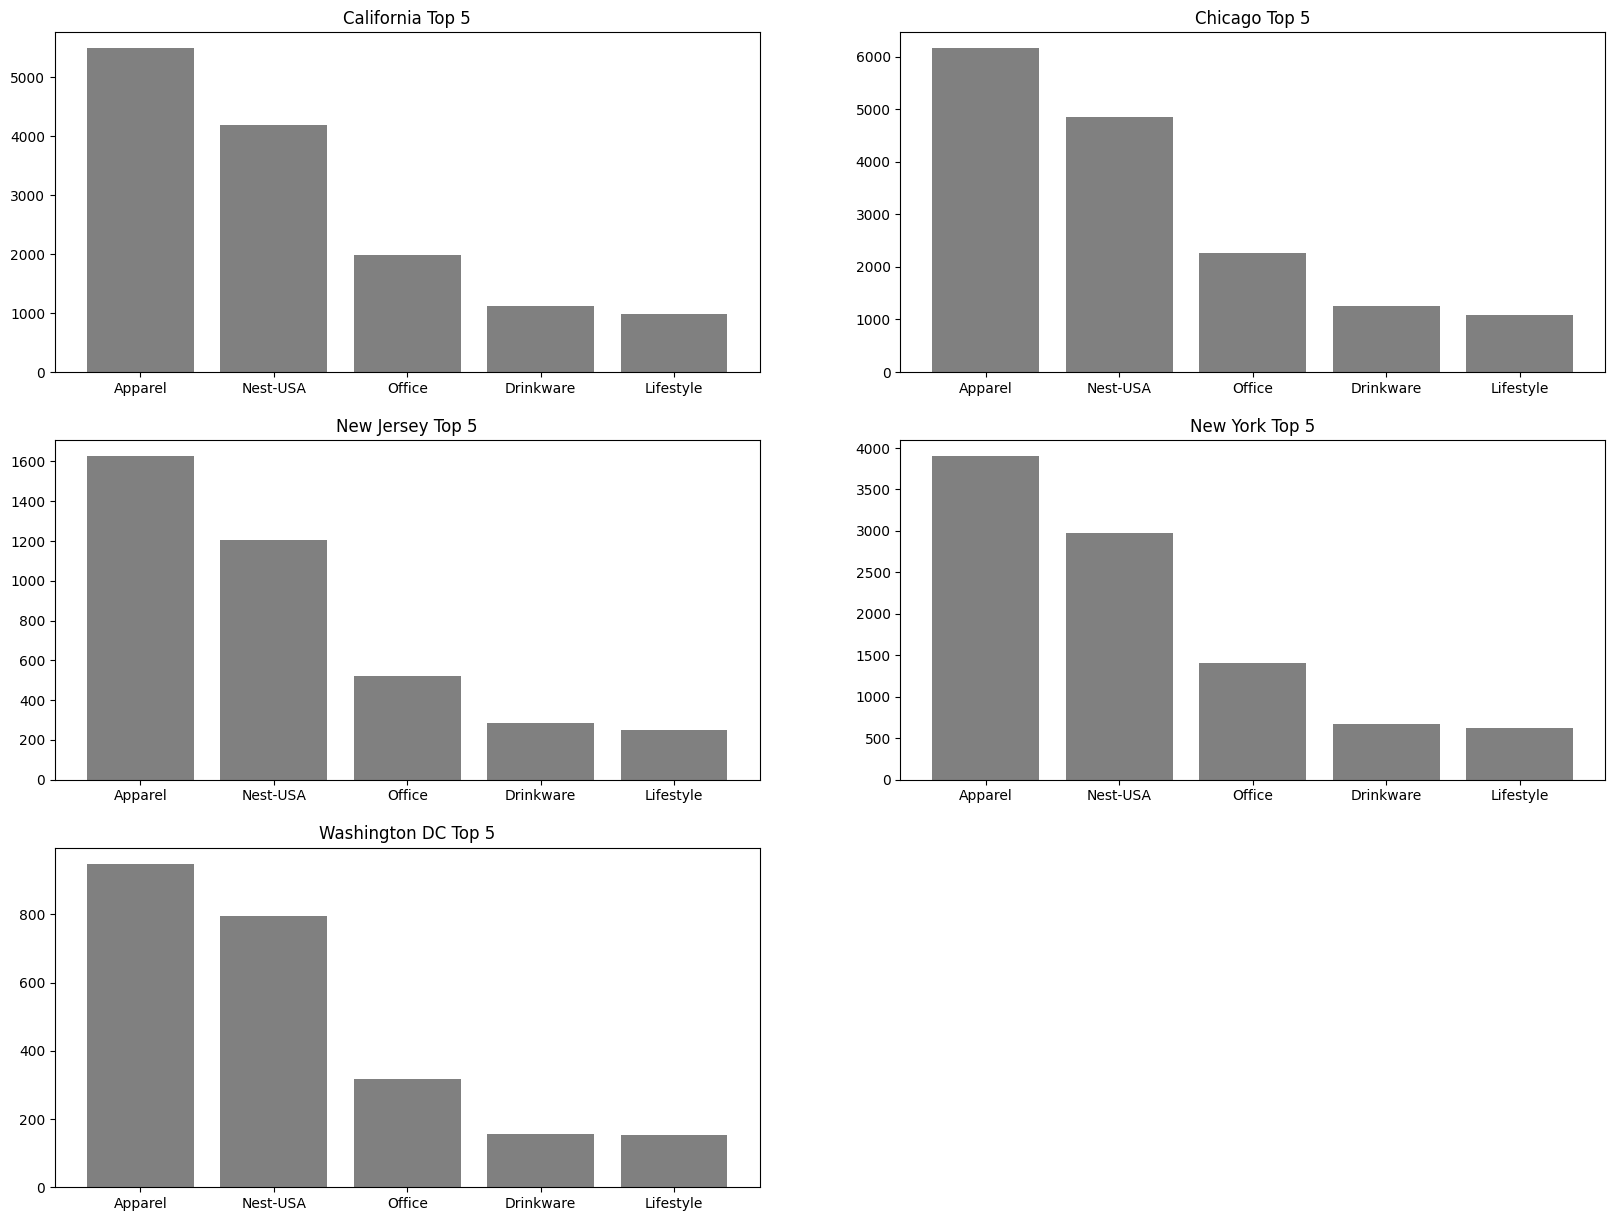

In [17]:
plt.figure(figsize=(20,15))

for i, location in enumerate(location_sales.index) :
    num = i + 1
    
    plt.subplot(3,2,num)
    cnt, index = get_top_five(location)
    plt.title(location + ' Top 5')
    plt.bar(index, cnt, color='gray')

plt.show()

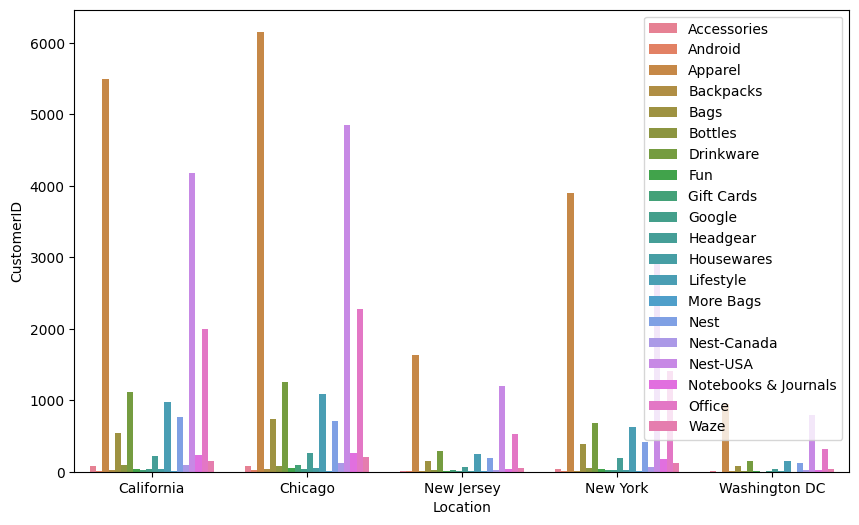

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales_customer_df_groupby.reset_index(), x='Location', y='CustomerID', hue='Product_Category')
plt.legend(loc='upper right')
plt.show()

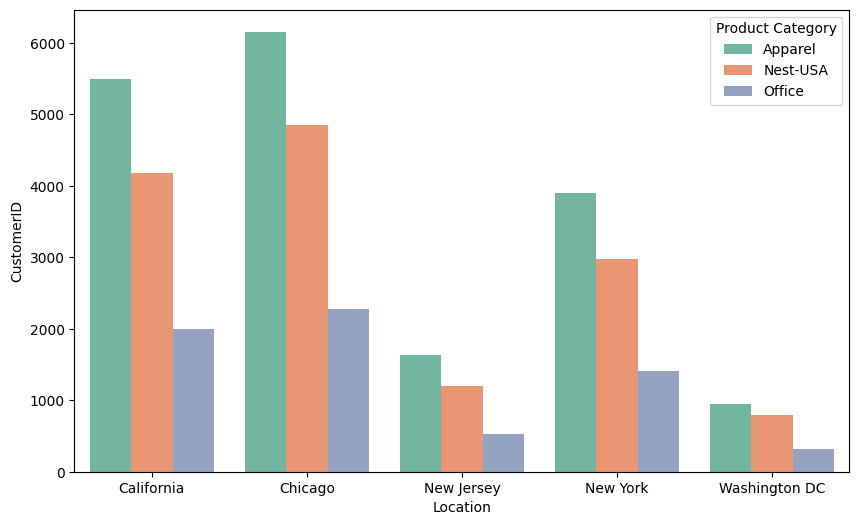

In [19]:
# 각 Location 별로 CustomerID가 많은 순으로 상위 3개의 Product_Category 선택
top_categories_by_location = sales_customer_df_groupby.groupby('Location')['CustomerID'].nlargest(3).reset_index(level=1, drop=True)

# 선택된 Product_Category에 해당하는 데이터 추출
selected_data = sales_customer_df_groupby.loc[top_categories_by_location.index]

plt.figure(figsize=(10, 6))
sns.barplot(data=selected_data.reset_index(), x='Location', y='CustomerID', hue='Product_Category', palette='Set2')
plt.legend(title='Product Category', loc='upper right')
plt.show()

### 결론

- 5개 지역 모두 Apparel(의류), Nest-USA, Office(사무), Drinkware(잔), Lifestyle 순 이다.
- 즉, 지역마다 선호하는 상품이 편중되어 있지 않다.

- 지역 별 선호상품 패키지 이벤트는 옳은 이벤트가 아니고, 가장 주문수가 많은 Apparel, Nest-USA 등에 집중 마케팅이 필요해보인다.
- 또한, 지역별 마케팅은 주문 수가 많은 시카고, 캘리포니아에 집중하는 것이 좋아보인다.
- 연관 분석을 통해서 패키지 상품을 기획하는 방향도 생각해볼 수 있다.